## Static evolution

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
import seaborn as sns
from matplotlib.gridspec import GridSpec

plt.rcParams.update({"font.size": 16})

import helper

/Users/csengepetak/Documents/GitHub/CA_GRN2/helper.py:61: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (Array(float64, 2, 'A', False, aligned=True), Array(float64, 2, 'A', False, aligned=True))
  next_step = windows.dot(grn)
/Users/csengepetak/Documents/GitHub/CA_GRN2/helper.py:82: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (Array(float64, 2, 'C', False, aligned=True), Array(float64, 2, 'A', False, aligned=True))
  next_step = gene_vals.dot(internal_grn)


In [2]:
#Parameters
pop_size = 1000
grn_size = 22
num_cells = 22
dev_steps = 22
geneid = 1

rule = 90
seed_int = 1024

pop = np.random.randn(pop_size, grn_size+2, grn_size).astype(np.float64)
targets, phenos, fitnesses = helper.get_pop_TPF(pop, pop_size, num_cells, grn_size, dev_steps, geneid, rule, seed_int)

#pickle.dump(phenos, open("random_phenos.p", "wb" ) )
#phenos = pickle.load(open("random_phenos.p", "rb"))

#### Final fitness

In [3]:
max_fits = pickle.load(open("static_max_fits_all256.p", "rb"))
#256 rules, 5 reps, 1000 generations
evolved_mean=np.mean(np.array(max_fits)[:,:,-1],axis=1) #average final fitness of 5 reps
evolved_std=np.std(np.array(max_fits)[:,:,-1],axis=1) #average final fitness of 5 reps

rules=list(range(0,256))
fits=[]
for rule in rules:
    targets, calc_phenos, calc_fitnesses = helper.get_pop_TPF(pop, pop_size, num_cells, grn_size, dev_steps, geneid, rule, seed_int)
    fits.append(calc_fitnesses)
rand_ave=np.mean(np.array(fits),axis=1)
rand_max=np.max(np.array(fits),axis=1)
rand_std=np.std(np.array(fits),axis=1)

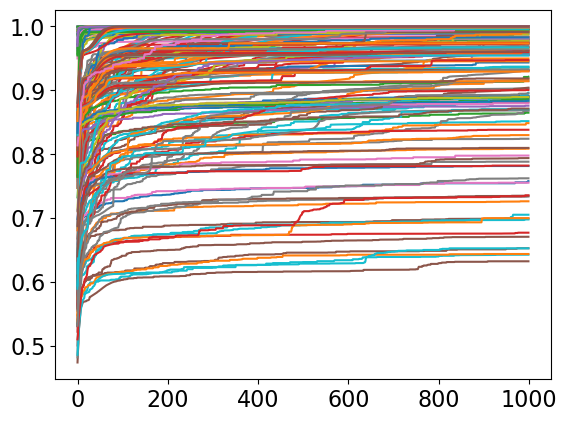

In [4]:
ave_max=np.mean(np.array(max_fits),axis=1)
plt.plot(ave_max.T)
plt.show()

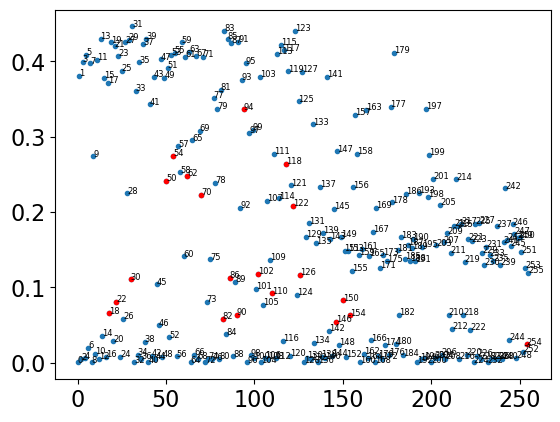

In [5]:
deltas = ave_max[:,-1] - ave_max[:,0]
#deltas.shape
plt.plot(list(range(256)),deltas, ".")

rules=[30,50,54,62,90,94,102,110,150,254,22, 126, 146, 154, 82, 86, 18, 118, 122, 70]
plt.plot(rules,deltas[rules], ".", color="red")

for i,(x,y) in enumerate(zip(list(range(256)),deltas)):
    S = 20
    plt.text(x ,y ,f"{i}", fontsize=6)

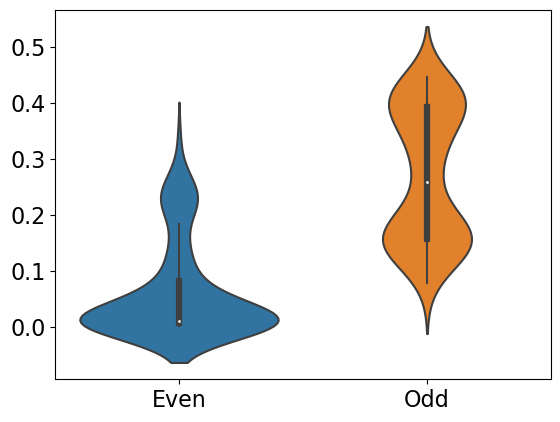

In [6]:
evenrules=deltas[np.arange(0,256,2)]
oddrules=deltas[np.arange(1,256,2)]

sns.violinplot([evenrules,oddrules])
plt.xticks([0, 1], ['Even', 'Odd'])
plt.show()

#odd rules have larger deltas because random GRNs don't tend to do 000->1, which is the odd rules. 
# so random GRNs are really bad at those

In [7]:
highdelta=np.where(deltas > 0.33)[0]
highdelta[np.where(highdelta % 2 == 0)] # 94 is the only even rule

array([94])

In [8]:
newrules = [22, 126, 146, 154, 82, 86, 18, 118, 122, 70]

[0.75777899 1.         0.96311886 0.98020177 0.89097967 0.99502101
 0.92121491 0.88385652 0.7814705  1.         0.86499484 0.79784371
 0.87968372 0.88996689 0.88601249 0.75534678 0.8913187  0.97704619
 0.99560226 0.98921396]


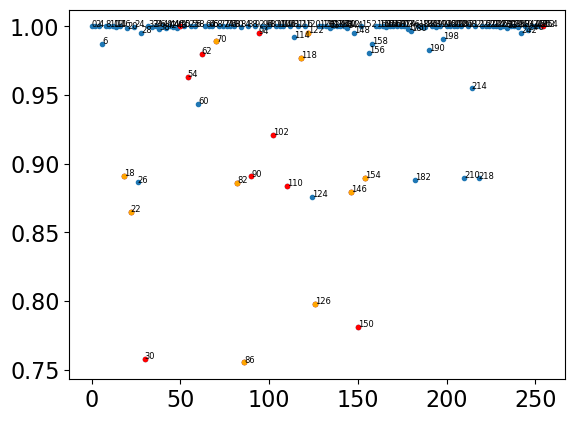

In [10]:
deltas = ave_max[:,-1]
#deltas.shape
evens=np.arange(0,256,2) #plotting only even rules - those are the valid ones anyways
plt.plot(evens,deltas[evens], ".")

rules=[30,50,54,62,90,94,102,110,150,254,22, 126, 146, 154, 82, 86, 18, 118, 122, 70]
plt.plot(rules,deltas[rules], ".", color="red")
plt.plot(newrules,deltas[newrules], ".", color="orange")

for i,(x,y) in enumerate(zip(evens,deltas[evens])):
    S = 20
    plt.text(x ,y ,f"{x}", fontsize=6)

print(deltas[rules])

/Users/csengepetak/miniconda3/envs/grnenv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/csengepetak/miniconda3/envs/grnenv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


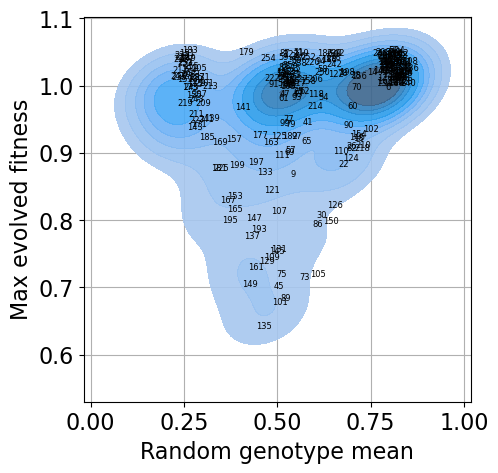

In [11]:
plt.figure(figsize=(5,5))
#plt.scatter(rand_ave,evolved_mean)
sns.kdeplot(x=rand_ave,y=evolved_mean, fill=True, zorder=3, alpha=0.9)
for i,(x,y) in enumerate(zip(rand_ave,evolved_mean)):
    S = 20
    plt.text(x + np.random.rand()/S,y + np.random.rand()/S,f"{i}", fontsize=6)
plt.grid(zorder=0)
plt.ylabel("Max evolved fitness")
plt.xlabel("Random genotype mean")
#slope, intercept = np.polyfit(evolved, rand_ave, 1)
#plt.plot(evolved, slope*evolved + intercept, color='red', label='Line of Best Fit')
plt.show()

Text(0, 0.5, 'Std of max fits between replicates')

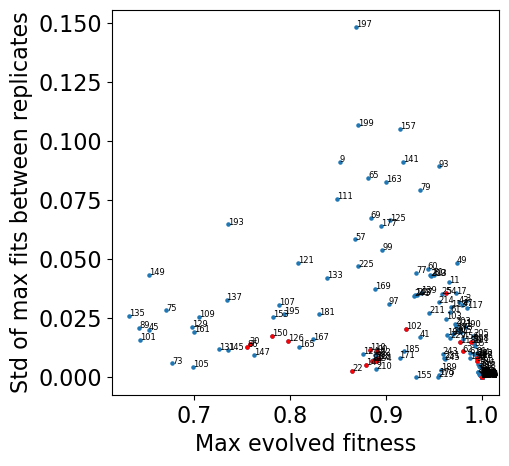

In [12]:
plt.figure(figsize=(5,5))
plt.scatter(evolved_mean,evolved_std, s=5)

rules=[30,50,54,62,90,94,102,110,150,254,22, 126, 146, 154, 82, 86, 18, 118, 122, 70]
plt.scatter(evolved_mean[rules],evolved_std[rules], color="red", s=5)

for i,(x,y) in enumerate(zip(evolved_mean,evolved_std)):
    S = 20
    plt.text(x ,y ,f"{i}", fontsize=6)


plt.xlabel("Max evolved fitness")
plt.ylabel("Std of max fits between replicates")

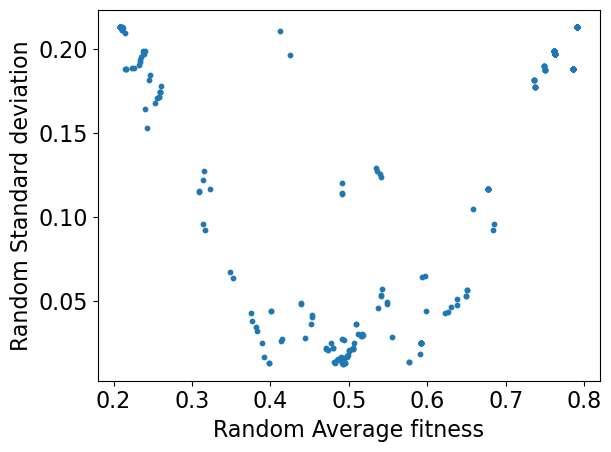

In [13]:
plt.scatter(rand_ave,rand_std,s=10)
plt.xlabel("Random Average fitness")
plt.ylabel("Random Standard deviation")
#plt.xlim(0,1)
plt.tight_layout()

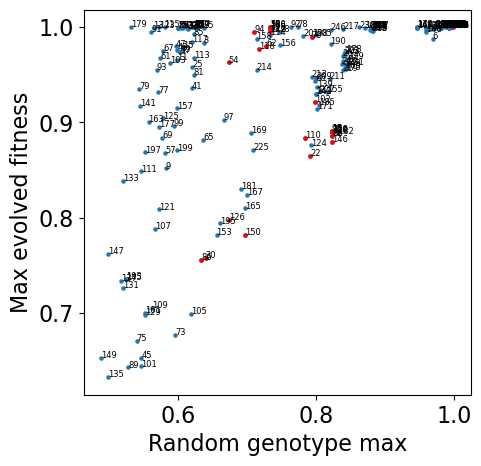

In [14]:
plt.figure(figsize=(5,5))
plt.scatter(rand_max,evolved_mean, s=5)
plt.ylabel("Max evolved fitness")
plt.xlabel("Random genotype max")

rules=[30,50,54,62,90,94,102,110,150,254,22, 126, 146, 154, 82, 86, 18, 118, 122, 70]
plt.scatter(rand_max[rules],evolved_mean[rules], color="red", s=5)

for i,(x,y) in enumerate(zip(rand_max,evolved_mean)):
    S = 20
    plt.text(x ,y ,f"{i}", fontsize=6)

slope, intercept = np.polyfit(evolved_mean, rand_max, 1)
#plt.plot(evolved, slope*evolved + intercept, color='red', label='Line of Best Fit')
plt.show()

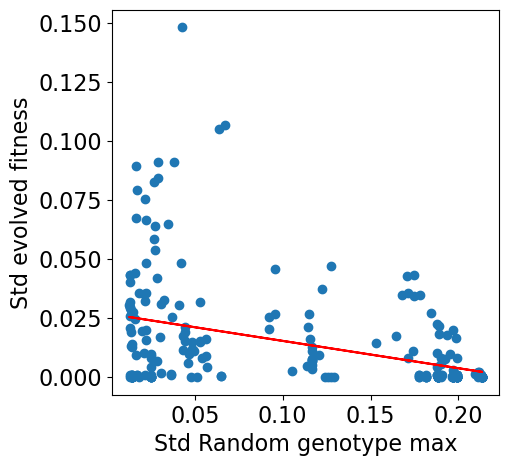

In [15]:
plt.figure(figsize=(5,5))
plt.scatter(rand_std,evolved_std)
plt.ylabel("Std evolved fitness")
plt.xlabel("Std Random genotype max")

slope, intercept = np.polyfit(rand_std, evolved_std, 1)
plt.plot(rand_std, slope*rand_std + intercept, color='red', label='Line of Best Fit')
plt.show()

### Temporal behaviour

/var/folders/41/13rhly317ygcfk0c_1jggxch0000gn/T/ipykernel_51420/1405594078.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(new_labels)


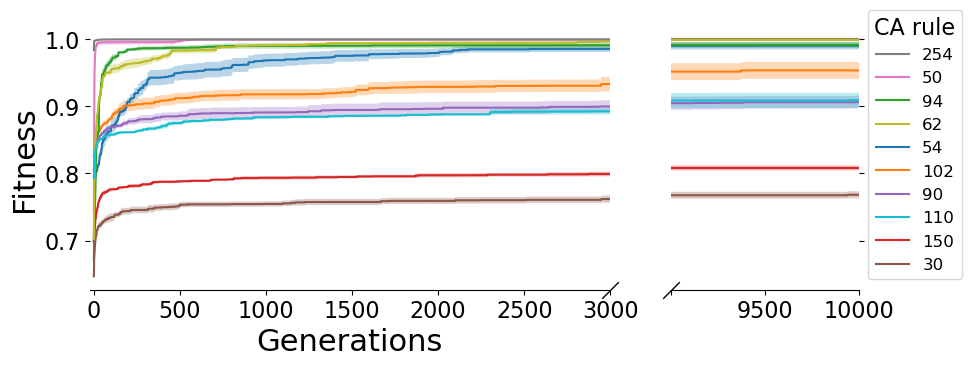

In [21]:
max_fits = pickle.load(open("static_max_fits.p", "rb"))
#max_fits = pickle.load(open("static_ave_fits.p", "rb"))
#max_fits = pickle.load(open("static_kidstds.p", "rb"))



rules=[54,102,94,150,90,30,50,254,62,110]
rule_order=[254,50,94,62,54,102,90,110,150,30]
order=[]
for i in rule_order:
    j=np.where(np.array(rules) == i)[0][0]
    order.append(j)

fig = plt.figure(figsize=(10, 4))
# fig = plt.figure(layout="constrained")
gs = GridSpec(1, 10, figure=fig)
ax1 = fig.add_subplot(gs[0, :7])
ax2 = fig.add_subplot(gs[0, 7:])

for idx, data in enumerate(max_fits):
    # Calculate mean and standard error for each list
    mean1 = np.mean(data, axis=0)
    stderr1 = np.std(data, axis=0) / np.sqrt(len(data))

    ax1.fill_between(range(len(mean1)), mean1 - stderr1, mean1 + stderr1, alpha=0.3)
    ax2.fill_between(range(len(mean1)), mean1 - stderr1, mean1 + stderr1, alpha=0.3)

    # plot the same data on both axes
    ax1.plot(mean1, "-", color=f"C{idx}", label=rules[idx])
    ax2.plot(mean1, "-", color=f"C{idx}", label=rules[idx])


# Get handles and labels from the current axes
handles, labels = plt.gca().get_legend_handles_labels()

# Reorder handles and labels
handles = [handles[i] for i in order]
labels = [labels[i] for i in order]

ax1.set_xlim(-25, 3_000)
ax2.set_xlim(9_000, 10_000)
#ax1.set_ylim(0.6, 1.01)
#ax2.set_ylim(0.6, 1.01)

ax1.yaxis.tick_left()
ax1.spines.right.set_visible(False)
ax1.spines.top.set_visible(False)
ax1.spines.left.set_visible(False)

ax2.yaxis.tick_right()
ax2.spines.left.set_visible(False)
ax2.spines.top.set_visible(False)
ax2.spines.right.set_visible(False)
ax2.set_yticklabels([])

# hide the first xtick of ax2, it's too close to the last of ax1
new_labels = [ticklabel.get_text() for ticklabel in ax2.get_xticklabels()]
new_labels[0] = ""
ax2.set_xticklabels(new_labels)

# Add labels and legend
ax1.set_xlabel("Generations",fontsize=22)
ax1.set_ylabel("Fitness",fontsize=22)

# ax1.legend(title="CA rule", fontsize=10)
#ax2.legend(title="CA rule", fontsize=12, loc="lower center")
plt.rcParams['legend.title_fontsize'] = 16
ax2.legend(handles, labels,title="CA rule",fontsize=12, bbox_to_anchor=(1, 1.1))

d = 1.0  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(
    marker=[(-1, -d), (1, d)],
    markersize=12,
    linestyle="none",
    color="k",
    mec="k",
    mew=1,
    clip_on=False,
)
ax1.plot([1], [0], transform=ax1.transAxes, **kwargs)
ax2.plot([0], [0], transform=ax2.transAxes, **kwargs)

plt.tight_layout()
#plt.savefig("figs/max_fits_10rules.pdf")
plt.show()

# Other
GRN size quick test

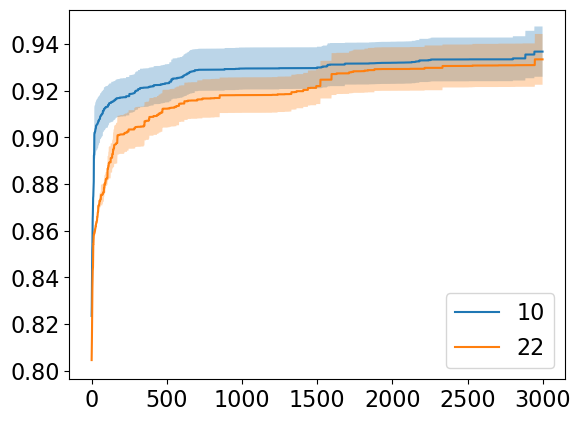

In [25]:
# 10 grn_size?
allfits=[]
for i in range(5):
    f=np.loadtxt(f'stats_300_102_1024_{i+1}_maxfits.txt')
    allfits.append(f)

data=np.array(allfits)
mean1 = np.mean(data, axis=0)
stderr1 = np.std(data, axis=0) / np.sqrt(len(data))
plt.fill_between(range(len(mean1)), mean1 - stderr1, mean1 + stderr1, alpha=0.3)
plt.plot(mean1, "-", label="10")

data=np.array(max_fits[1])[:,:3000]
mean1 = np.mean(data, axis=0)
stderr1 = np.std(data, axis=0) / np.sqrt(len(data))
plt.fill_between(range(len(mean1)), mean1 - stderr1, mean1 + stderr1, alpha=0.3)
plt.plot(mean1, "-", label="22")

allfits=[]
for i in range(5):
    f=np.loadtxt(f'500pop/stats_300_102_1024_{i+1}_maxfits.txt')
    allfits.append(f)

data=np.array(allfits)
mean1 = np.mean(data, axis=0)
stderr1 = np.std(data, axis=0) / np.sqrt(len(data))
#plt.fill_between(range(len(mean1)), mean1 - stderr1, mean1 + stderr1, alpha=0.3)
#plt.plot(mean1, "-", label="10, 500 pop")

plt.legend()


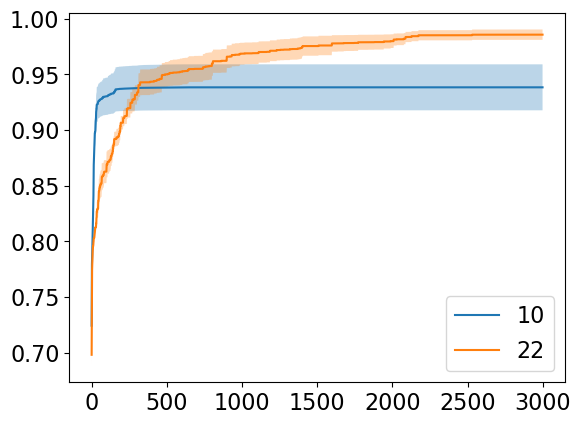

In [24]:
# 10 grn_size?
allfits=[]
for i in range(5):
    f=np.loadtxt(f'stats_300_54_1024_{i+1}_maxfits.txt')
    allfits.append(f)

data=np.array(allfits)
mean1 = np.mean(data, axis=0)
stderr1 = np.std(data, axis=0) / np.sqrt(len(data))
plt.fill_between(range(len(mean1)), mean1 - stderr1, mean1 + stderr1, alpha=0.3)
plt.plot(mean1, "-", label="10")

data=np.array(max_fits[0])[:,:3000]
mean1 = np.mean(data, axis=0)
stderr1 = np.std(data, axis=0) / np.sqrt(len(data))
plt.fill_between(range(len(mean1)), mean1 - stderr1, mean1 + stderr1, alpha=0.3)
plt.plot(mean1, "-", label="22")

allfits=[]
for i in range(5):
    f=np.loadtxt(f'500pop/stats_300_54_1024_{i+1}_maxfits.txt')
    allfits.append(f)

data=np.array(allfits)
mean1 = np.mean(data, axis=0)
stderr1 = np.std(data, axis=0) / np.sqrt(len(data))
#plt.fill_between(range(len(mean1)), mean1 - stderr1, mean1 + stderr1, alpha=0.3)
#plt.plot(mean1, "-", label="10, 500 pop")

plt.legend()


### Illustrative

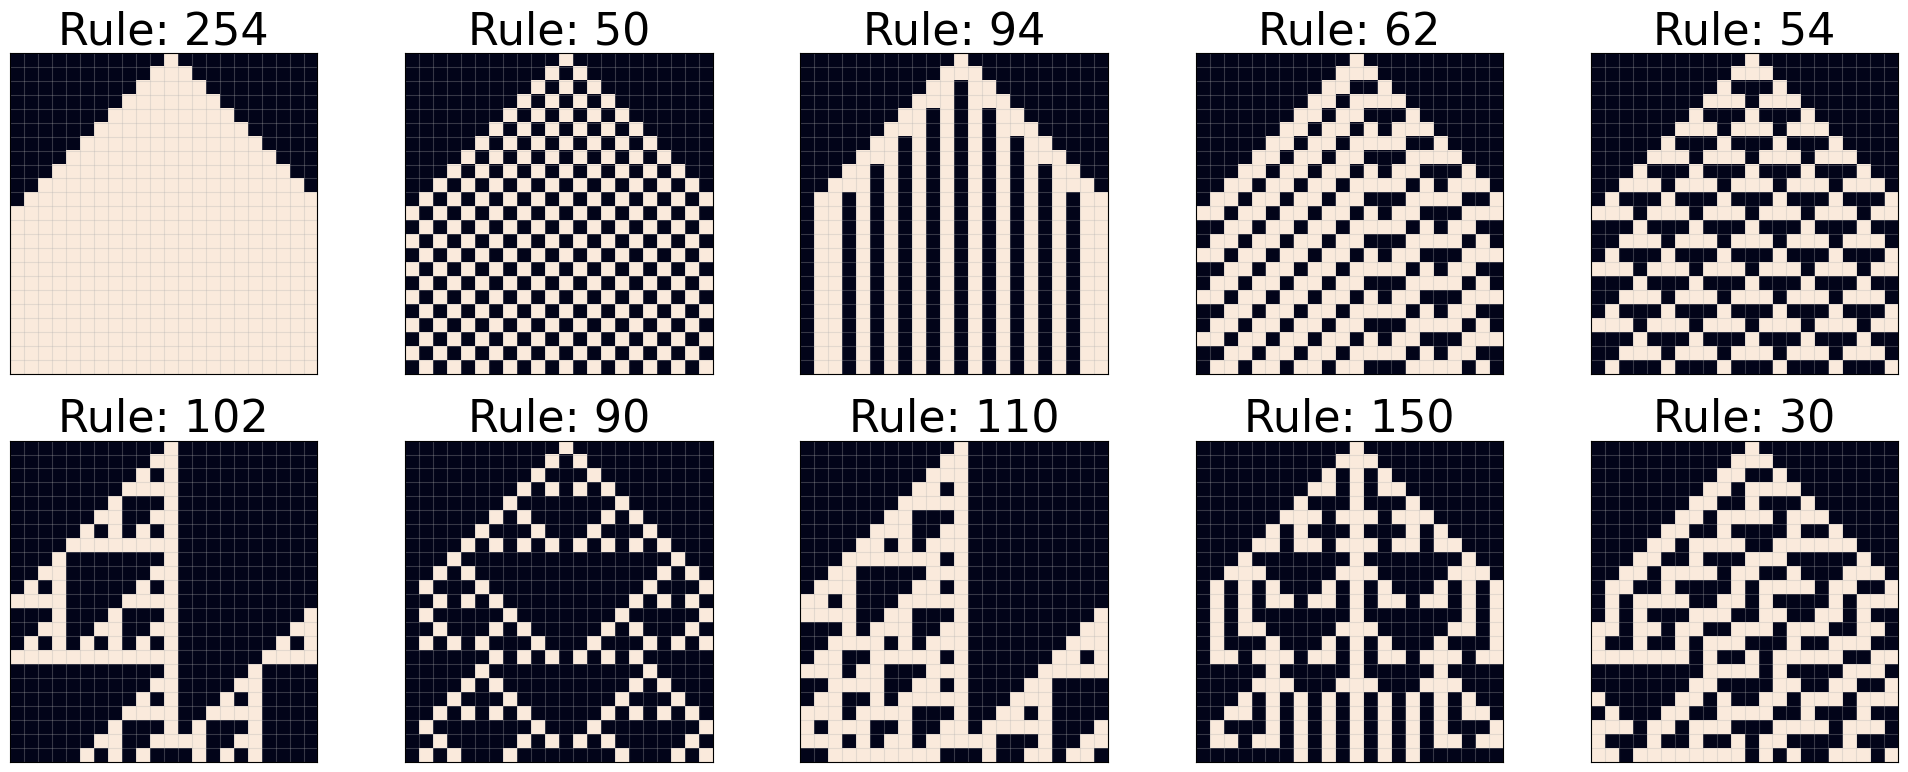

In [16]:
rule_order=[254,50,94,62,54,102,90,110,150,30]
seedint = 1024
targets=[]
for r in rule_order:
    start_pattern = helper.seedID2string(seedint, num_cells)
    targets.append(helper.rule2targets_wrapped_wstart(int(r), L=dev_steps+1, N=num_cells, start_pattern=start_pattern))

nrows = 2
ncols = 5
scale=4

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * scale, nrows*scale), sharex=True, sharey=True)
axs = axs.flatten()

for i, ax in enumerate(axs):
    ca = targets[i]
    rule = rule_order[i]
    helper.imshow_ca(ca,ax=ax)
    ax.set_title(f"Rule: {rule}", fontsize=32)

plt.tight_layout()